## DH Matrix

### Steps

1. rotate Z_n-1 axis **theta** 
2. translate along Z_n-1 axis **d** 
3. translate along X_n axis **gama**
4. rotate X_n axis **alpha**

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi
# from math import cos, sin
# from math import sqrt

In [3]:
# Define DH function
def dh_matrix(theta, d, gama, alpha):
    T_1 = rot_z(theta) @ trans(0, 0, d) @ trans(gama, 0, 0) @  rot_x(alpha) 
#     T_1 = np.array([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), gama*cos(theta)],
#                   [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), gama*sin(theta)],
#                    [0, sin(alpha), cos(alpha), d],
#                    [0, 0, 0, 1]])
    return T_1
    
def trans(x, y, z):
    T_2 = np.eye(4)
    T_2[:,3] = np.array([x,y,z,1]).T
    return T_2
    
def rot_z(theta):
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                           [np.sin(theta), np.cos(theta), 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])
    return rot_matrix

def rot_x(alpha):
    rot_matrix = np.array([[1, 0, 0, 0],
                           [0, np.cos(alpha), -np.sin(alpha), 0],
                           [0, np.sin(alpha), np.cos(alpha), 0],
                           [0, 0, 0, 1]])
    return rot_matrix

[0. 0. 0.]
[0. 0. 5.]
[3. 0. 5.]
[3. 1. 5.]
[3. 1. 2.]


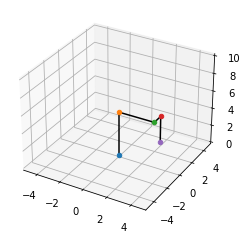

In [4]:
p0 = np.array([0., 0., 0., 1.])

Z = 5
L1 = 3
L2 = 1
T = 1

q1, q2, q3, q4 = 0, 0, pi/2, 2

p1 = dh_matrix(0, Z, 0, 0) @ p0
p2 = dh_matrix(0, Z, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ p0
p3 = dh_matrix(0, Z, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ p0
p4 = dh_matrix(0, Z, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(0, -T-q4, 0, 0.3) @ p0

p = np.asarray([p0.T, p1.T, p2.T, p3.T, p4.T])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);

for i in range(p.shape[0]):
    print(p[i][0:3])
    ax.scatter3D(p[i][0], p[i][1], p[i][2])
    if i != 0:
        ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')




### Interaction

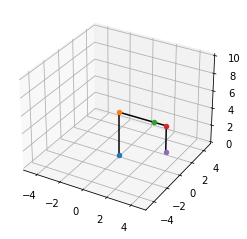

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def dh_interact(q1, q2, q3, q4):
    p0 = np.array([0., 0., 0., 1.])
    
    p1 = dh_matrix(0, Z, 0, 0) @ p0
    p2 = dh_matrix(0, Z, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ p0
    p3 = dh_matrix(0, Z, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ p0
    p4 = dh_matrix(0, Z, 0, 0)@ dh_matrix(q2, 0, L1, 0) @ dh_matrix(q3, 0, L2, 0) @ dh_matrix(0, -T-q4, 0, 0.3) @ p0

    p = np.asarray([p0.T, p1.T, p2.T, p3.T, p4.T])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);
    
    for i in range(p.shape[0]):
#     print(p[i][0:3])
        ax.scatter3D(p[i][0], p[i][1], p[i][2])
        if i != 0:
            ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')

interactive_plot = interactive(dh_interact, q1=(-pi, pi), q2=(-pi, pi), q3=(-pi, pi), q4=(0, 4))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot



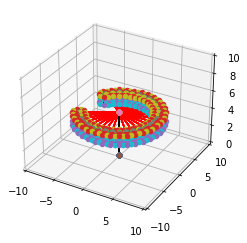

In [6]:
test_q2 = np.arange(-150, 150, 10)
test_q3 = np.arange(0, 360, 36)
test_q2 = test_q2 / 180 * pi
test_q3 = test_q3 / 180 * pi

p0 = np.array([0., 0., 0., 1.])

Z = 5
L1 = 6
L2 = 1
T = 1

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10, 10); ax.set_ylim(-10, 10); ax.set_zlim(0, 10);

for k in range(len(test_q2)):
    for j in range(len(test_q3)):
        
        q1, q2, q3, q4 = 0, test_q2[k], test_q3[j], 0

        H_01 = dh_matrix(0, Z, 0, 0)
        H_02 = H_01 @ dh_matrix(q2, 0, L1, 0)
        H_03 = H_02 @ dh_matrix(q3, 0, L2, 0) 
        H_04 = H_03 @ dh_matrix(q4, -T, 0, 0) 

        p1 = H_01 @ p0
        p2 = H_02 @ p0
        p3 = H_03 @ p0
        p4 = H_04 @ p0

        p = np.asarray([p0.T, p1.T, p2.T, p3.T, p4.T])

        for i in range(p.shape[0]):
            ax.scatter3D(p[i][0], p[i][1], p[i][2])
            if i == 2:
                ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'r')
            if i == 3:
                ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'b')
            elif i==1 or i == 4:
                ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')






# Exercise Forward Transformation

**DH parameter**

| | theta | d | r | alpha |
|:-:|:-:|:-:|:-:|:-:|
|0_T_1|q1|h1|0|0|
|1_T_2|0|0|I|q2|
|2_T_3|0|h2+q3|0|0|
|3_T_tcp|0|h3|0|0|


In [10]:
# declare the symbols
import sympy as sp
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)
from sympy.physics.mechanics import dynamicsymbols
h1, h2, h3, q1, q2, q3, I_ = dynamicsymbols('h1 h2 h3 q1 q2 q3 I_')
h1, h2, h3, q1, q2, q3, I_ = 2, 2, 2, pi/4, pi/4, 2,5

[0. 0. 0.]
[0. 0. 2.]
[3.53553391 3.53553391 2.        ]
[5.53553391 1.53553391 4.82842712]
[6.53553391 0.53553391 6.24264069]


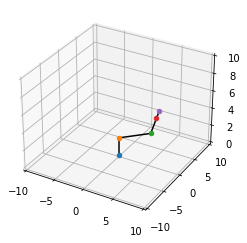

In [9]:
T_01 = dh_matrix(q1, h1, 0, 0)
T_12 = dh_matrix(0, 0, I_, q2)
T_23 = dh_matrix(0, h2+q3, 0, 0)
T_3tcp = dh_matrix(0, h3, 0, 0)

H_01 = T_01
H_02 = H_01 @ T_12
H_03 = H_02 @ T_23
H_04 = H_03 @ T_3tcp

p0 = np.array([0., 0., 0., 1.])
p1 = H_01 @ p0
p2 = H_02 @ p0
p3 = H_03 @ p0
ptcp = H_04 @ p0

p = np.asarray([p0.T, p1.T, p2.T, p3.T, ptcp.T])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-10, 10); ax.set_ylim(-10, 10); ax.set_zlim(0, 10);

for i in range(p.shape[0]):
    print(p[i][0:3])
    ax.scatter3D(p[i][0], p[i][1], p[i][2])
    if i != 0:
        ax.plot3D([p[i-1][0], p[i][0]], [p[i-1][1], p[i][1]], [p[i-1][2], p[i][2]], 'k')
